In [1]:
import pandas as pd
import numpy as np
import re 
import matplotlib as plt

In [2]:
df = pd.read_csv(r"C:\Users\ONnodum\Downloads\BasicCompanyDataAsOneFile-2023-09-01.zip")


C:\Users\ONnodum\venvs\bvd_venv\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (41,42,43,44,45,46,47,48,49,50,51,52) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
cols_drop = ['Accounts.AccountRefDay',
       'Accounts.AccountRefMonth', 'Accounts.NextDueDate',
       'Accounts.LastMadeUpDate', 'Accounts.AccountCategory',
       'Returns.NextDueDate', 'Returns.LastMadeUpDate',
       'Mortgages.NumMortCharges', 'Mortgages.NumMortOutstanding',
       'Mortgages.NumMortPartSatisfied', 'Mortgages.NumMortSatisfied',
       'LimitedPartnerships.NumGenPartners',
       'LimitedPartnerships.NumLimPartners', 'URI', 'PreviousName_1.CONDATE',
       ' PreviousName_1.CompanyName', ' PreviousName_2.CONDATE',
       ' PreviousName_2.CompanyName', 'PreviousName_3.CONDATE',
       ' PreviousName_3.CompanyName', 'PreviousName_4.CONDATE',
       ' PreviousName_4.CompanyName', 'PreviousName_5.CONDATE',
       ' PreviousName_5.CompanyName', 'PreviousName_6.CONDATE',
       ' PreviousName_6.CompanyName', 'PreviousName_7.CONDATE',
       ' PreviousName_7.CompanyName', 'PreviousName_8.CONDATE',
       ' PreviousName_8.CompanyName', 'PreviousName_9.CONDATE',
       ' PreviousName_9.CompanyName', 'PreviousName_10.CONDATE',
       ' PreviousName_10.CompanyName', 'ConfStmtNextDueDate',
       ' ConfStmtLastMadeUpDate', 'RegAddress.CareOf', 'RegAddress.POBox', 'CompanyCategory', 'CountryOfOrigin', "SICCode.SicText_1", "SICCode.SicText_2", "SICCode.SicText_3", "SICCode.SicText_4"]
df = df.drop(cols_drop, axis=1)

In [8]:
# Group by address and count the number of companies
address_company_counts = df.groupby('RegAddress.PostCode')['CompanyName'].count().reset_index()
address_company_counts.columns = ['Address', 'Num_Companies']



In [25]:
#Count number of active companies
msk = (df['CompanyStatus'] == 'Active') 
ACTIVE_COMP = (df[msk])
ACTIVE_COMP


4962995

In [26]:
#Drop NAN Values in order to count unique PCodes
df['RegAddress.PostCode'].str.strip()
df['RegAddress.PostCode'].str.replace("'", "")
df.replace(['None', 'nan'], np.nan, inplace=True)
df.dropna(subset=['RegAddress.PostCode'], inplace = True)


In [28]:
#Count valid unique UK postcodes
pat = r'.*\d{1,2}[a-zA-Z]{2}$'
df[df['RegAddress.PostCode'].str.contains(pat, na = False)]['RegAddress.PostCode'].nunique()

916460

In [29]:
#Replace column values with regex matches
df['Unique_pcode'] = df[df["RegAddress.PostCode"].str.contains(pat, na = False)]['RegAddress.PostCode']
df.dropna(subset=['Unique_pcode'], inplace = True)



In [30]:
df['Unique_pcode'] = df['Unique_pcode'].str.replace(r'\s+', "", regex = True)
df['Unique_pcode'] = df['Unique_pcode'].str.replace(',', "", regex = True)

In [31]:
df['Unique_pcode']

0           GU14RY
1           HG11ND
2           SK63DY
3          EC1V9LT
4          CM233FR
            ...   
5393601    EC3V3NG
5393602     SY11XF
5393603     SW31BW
5393604    MK420PQ
5393605     PR22DX
Name: Unique_pcode, Length: 4872746, dtype: object

In [32]:
#Simplifying data column to show postcode count
df1 = pd.DataFrame()
df1['postcode'] = df['Unique_pcode']
df1['company'] = df['CompanyName']
df1.groupby(by='postcode').count().sort_values('company', ascending = False).head(60)


,company
postcode,
WC2H9JQ,76649
EC1V2NX,46778
N17GU,41234
EC2A4NE,19554
WC1N3AX,16211
W1W7LT,12640
CF148LH,11927
WC2A2JR,9090
CR26EQ,7461


In [33]:
#Top 100 Most Popular UK postcodes
df1.groupby(by='postcode').count().nlargest(100, 'company')

,company
postcode,
WC2H9JQ,76649
EC1V2NX,46778
N17GU,41234
EC2A4NE,19554
WC1N3AX,16211
...,...
SK72DH,1221
DN68DA,1215
NW35JS,1214


### SCOTLAND/ NORTHERN IRELAND ANALYSIS


#### Data Pre-processing

In [81]:
#Convert everything to Upper case
df['RegAddress.County'] = df['RegAddress.County'].str.upper()
df['RegAddress.Country'] = df['RegAddress.Country'].str.upper()
#Remove whitespace in the data column
df['RegAddress.County'] = df['RegAddress.County'].str.strip()
df['RegAddress.Country'] = df['RegAddress.Country'].str.strip()

In [82]:
#Convert values to string datatypes
df['RegAddress.County'] = df['RegAddress.County'].astype(str)
df['RegAddress.Country'] = df['RegAddress.Country'].astype(str)

In [86]:
#Add Scotland or Northern Ireland to Country columns if they were in a County
def update_country(row):
    if 'NORTHERN IRELAND' in row['RegAddress.County']:
        return 'NORTHERN IRELAND'
    elif 'SCOTLAND' in row['RegAddress.County']:
        return 'SCOTLAND'
    else:
        return row['RegAddress.Country']
    


In [87]:
#Apply the function to update the Country column
df['RegAddress.Country'] = df.apply(update_country, axis = 1)

In [89]:
SCOTLAND_DF = df[df['RegAddress.County'] == 'SCOTLAND']
NORTHERN_IRELAND_DF = df[df['RegAddress.County'] == 'NORTHERN IRELAND']

In [103]:
NORTHERN_IRELAND_DF[['RegAddress.AddressLine1', ]].value_counts()

SUITE 2                                           89
272 BATH STREET                                   44
45 ROSEHAUGH ROAD                                 42
12 SOUTH BRIDGE                                   40
39/5 GRANTON CRESCENT                             39
PO BOX 17452 2 LOCHSIDE VIEW                      39
C/O PENGUIN HOUSE, CASTLE RIGGS                   36
SUITE 6                                           35
C/O ASKARI & CO LIMITED                           35
SUITE 2,                                          31
24 STATION SQUARE                                 24
C/O TURCAN CONNELL PRINCES EXCHANGE               21
CASTLE HOUSE 1 BAKER STREET                       20
C/O PREMIER ACCOUNTING 9B DALRYMPLE COURT         20
FIRST FLOOR 4 EARLS COURT                         18
BRODIES HOUSE                                     15
C/O FORESIGHT GROUP LLP CLARENCE HOUSE            14
LAS SUITE                                         13
MAXIM 7, MAXIM OFFICE PARK PARKLANDS AVENUE   

#### NORTHERN_IRELAND ANALYSIS

In [119]:
NORTHERN_IRELAND_DF[['RegAddress.AddressLine1','RegAddress.PostCode' ]].value_counts()

RegAddress.AddressLine1            RegAddress.PostCode
OFFICE 525                         BT9 6AZ                56
C/O EARLSWOOD VETERINARY HOSPITAL  BT4 2AE                12
42-46 FOUNTAIN STREET              BT1 5EF                 9
SUITE 4 COMMERCIAL MEWS            BT40 1HJ                8
2ND FLOOR CALLENDER HOUSE          BT1 4GJ                 6
                                                          ..
35 SPRINGFIELD DRIVE               BT12 7EL                1
37-39 WILLIAM STREET               BT66 6JA                1
38-42 HILL STREET                  BT1 2LB                 1
39 GLENVILLE ROAD                  BT44 0PB                1
UNIT NO D1, WIN BUSINESS PARK      BT35 6PH                1
Length: 219, dtype: int64

In [107]:
N_RELAND_DF = NORTHERN_IRELAND_DF['RegAddress.AddressLine1'].value_counts()
N_RELAND_DF = pd.Series(N_RELAND_DF, name = 'No of Companies')

In [111]:
N_RELAND_DF = N_RELAND_DF.reset_index()
N_RELAND_DF

,level_0,index,RegAddress.AddressLine1
0,0,OFFICE 525,56
1,1,C/O EARLSWOOD VETERINARY HOSPITAL,12
2,2,42-46 FOUNTAIN STREET,9
3,3,SUITE 4 COMMERCIAL MEWS,8
4,4,2ND FLOOR CALLENDER HOUSE,6
...,...,...,...
214,214,23 GREEN DRIVE,1
215,215,"8TH FLOOR, CITY EXCHANGE BUILDING",1
216,216,C/O,1
217,217,70-72 EGLANTINE AVENUE MALONE GROVE APARTMENTS,1


In [113]:
from scipy import stats

In [114]:
THRESHOLD = 2.0
Z_SCORES1 = np.abs(stats.zscore(SCOTLAND_DF['RegAddress.PostCode']))
OUTLIER1 = N_RELAND_DF[Z_SCORES > THRESHOLD]['RegAddress.PostCode']
OUTLIER1

0    56
1    12
Name: RegAddress.AddressLine1, dtype: int64

#### SCOTLAND ANALYSIS

In [121]:
SCOTLAND_DF[['RegAddress.AddressLine1','RegAddress.PostCode' ]].value_counts().head(50)

RegAddress.AddressLine1                         RegAddress.PostCode
SUITE 2                                         EH3 6SW                83
272 BATH STREET                                 G2 4JR                 44
45 ROSEHAUGH ROAD                               IV3 8SW                42
12 SOUTH BRIDGE                                 EH1 1DD                40
PO BOX 17452 2 LOCHSIDE VIEW                    EH12 1LB               39
39/5 GRANTON CRESCENT                           EH5 1BN                39
C/O PENGUIN HOUSE, CASTLE RIGGS                 KY11 8SG               36
C/O ASKARI & CO LIMITED                         G41 2LL                35
SUITE 6                                         EH7 5JA                35
SUITE 2,                                        EH3 6SW                31
24 STATION SQUARE                               IV1 1LD                24
C/O TURCAN CONNELL PRINCES EXCHANGE             EH3 9EE                21
CASTLE HOUSE 1 BAKER STREET                 

In [115]:
SCOT_DF = SCOTLAND_DF['RegAddress.AddressLine1'].value_counts()
SCOT_DF= pd.Series(SCOT_DF, name = 'No of Companies')
SCOT_DF = SCOT_DF.reset_index()
SCOT_DF

,index,No of Companies
0,SUITE 2,89
1,272 BATH STREET,44
2,45 ROSEHAUGH ROAD,42
3,12 SOUTH BRIDGE,40
4,39/5 GRANTON CRESCENT,39
...,...,...
1009,SUITE 4410 MITCHELL HOUSE,1
1010,43 MARGARET WALK,1
1011,"76 LGF, GEORGE STREET, EDINBURGH GEORGE STREET",1
1012,14 KEMPOCK STREET,1


In [118]:
THRESHOLD = 2.0
Z_SCORES = np.abs(stats.zscore(SCOT_DF['No of Companies']))
OUTLIER1 = SCOT_DF[Z_SCORES > THRESHOLD]['No of Companies']
OUTLIER1

0     89
1     44
2     42
3     40
4     39
5     39
6     36
7     35
8     35
9     31
10    24
11    21
12    20
13    20
14    18
15    15
16    14
17    13
18    12
Name: No of Companies, dtype: int64

In [36]:
#Find UK postcode dataset and how many postcodes have no registered companies
POSTCODE_DATA = pd.read_csv(r"C:\Users\ONnodum\Downloads\postcodes.zip")

C:\Users\ONnodum\venvs\bvd_venv\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (7,17,18,21,22,24,29,32,39,47,51) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [37]:
cols_drop1 = ['Latitude', 'Longitude', 'Easting', 'Northing',
       'Grid Ref', 'County', 'District', 'Ward', 'District Code', 'Ward Code',
       'Country', 'County Code', 'Constituency', 'Introduced', 'Terminated',
       'Parish', 'National Park', 'Population', 'Households', 'Built up area',
       'Built up sub-division', 'Lower layer super output area', 'Rural/urban',
       'Region', 'Altitude', 'London zone', 'LSOA Code', 'Local authority',
       'MSOA Code', 'Middle layer super output area', 'Parish Code',
       'Census output area', 'Constituency Code',
       'Index of Multiple Deprivation', 'Quality', 'User Type', 'Last updated',
       'Nearest station', 'Distance to station', 'Postcode area',
       'Postcode district', 'Police force', 'Water company', 'Plus Code',
       'Average Income', 'Sewage Company', 'Travel To Work Area',
       'ITL level 2', 'ITL level 3', 'UPRNs', 'Distance to sea']
POSTCODE_DATA = POSTCODE_DATA.drop(cols_drop1, axis=1)

In [38]:
POSTCODE_DATA.head(30)

,Postcode,In Use?
0,AB1 0AA,No
1,AB1 0AB,No
2,AB1 0AD,No
3,AB1 0AE,No
4,AB1 0AF,No
5,AB1 0AG,No
6,AB1 0AJ,No
7,AB1 0AL,No
8,AB1 0AN,No
9,AB1 0AP,No


In [39]:
POSTCODE_MERGE = POSTCODE_DATA.merge(df1, how = 'left', left_on = 'Postcode', right_on = 'postcode', indicator = True)
POSTCODE_MERGE

,Postcode,In Use?,postcode,company,_merge
0,AB1 0AA,No,NaN,NaN,left_only
1,AB1 0AB,No,NaN,NaN,left_only
2,AB1 0AD,No,NaN,NaN,left_only
3,AB1 0AE,No,NaN,NaN,left_only
4,AB1 0AF,No,NaN,NaN,left_only
...,...,...,...,...,...
2674231,ZE3 9JW,Yes,NaN,NaN,left_only
2674232,ZE3 9JX,Yes,NaN,NaN,left_only
2674233,ZE3 9JY,Yes,NaN,NaN,left_only
2674234,ZE3 9JZ,Yes,NaN,NaN,left_only


In [40]:
#Number of postcodes with no Company registered on them
NON_REGISTERED_PCODES = POSTCODE_MERGE[POSTCODE_MERGE['_merge']=='left_only']
len(NON_REGISTERED_PCODES)

2674236

In [41]:
def POSTCODE_FILTER(postcode):
    return POSTCODE_MERGE.loc[POSTCODE_MERGE['postcode'] == postcode, 'company'].to_frame()

In [42]:
#Filter companies based on Postcode
POSTCODE_FILTER('N1 7GU')
    
    

,company


In [43]:
POSTCODE_FILTER('ZE3 9JW')

,company


In [44]:
#Create function based on different filters(Active status, sector)

In [45]:
import matplotlib as plt

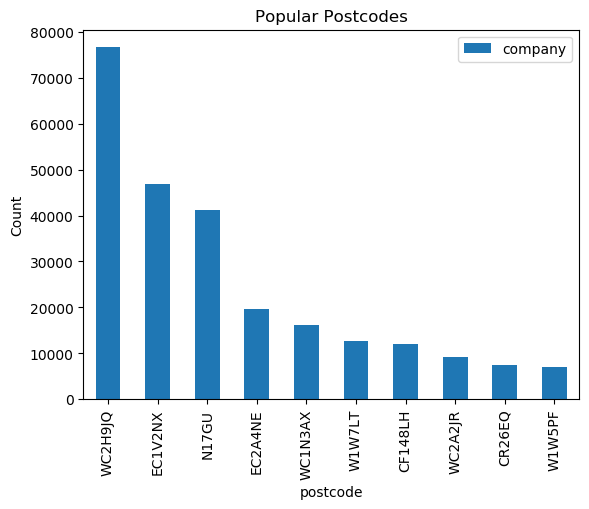

In [46]:
df1.groupby(by='postcode').count().nlargest(10, 'company').plot(kind = 'bar', ylabel = 'Count', title = 'Popular Postcodes')

In [47]:
def plottable(df, hline = False, **plotargs):
    figure =  df.plot(**plotargs)
    if hline:
        average_count = df.mean().iloc[0]
        figure.axhline(y = average_count, color = 'r')
    return figure

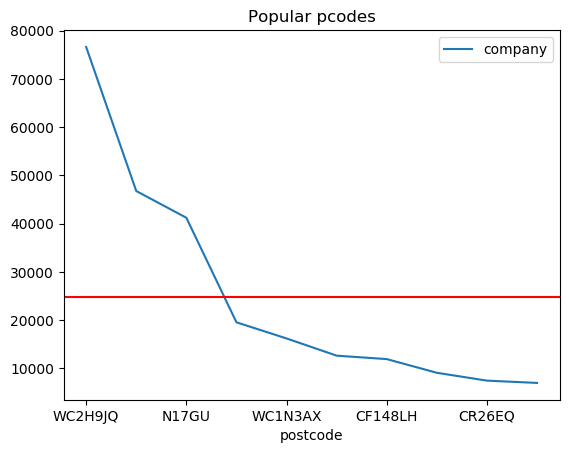

In [48]:
plottable(df1.groupby(by='postcode').count().nlargest(10, 'company'), title = 'Popular pcodes', hline = True)

In [49]:
df1.groupby(by='postcode').count().nlargest(10, 'company').mean().iloc[0]

24853.2